In [7]:
import pandas as pd
import gdown

class Sugeno_FIS:
    def __init__(self, numberOfMembershipFunctionInput=5, maxOfVelocity=120, maxOfDistance=1000):
        self.numberOfMembershipFunctionInput = numberOfMembershipFunctionInput
        self.maxOfVelocity = maxOfVelocity
        self.maxOfDistance = maxOfDistance
        self.data = self.get_data()

    def get_data(self):
        url = 'https://drive.google.com/uc?id=1Rup52iGA-xR_tqv1xy72sx-S24kvhgGA'
        file_path = 'Sugeno_Rules_Table.xlsx'
        gdown.download(url, file_path, quiet=False)
        return pd.read_excel(file_path)

    def get_parameters_MFs(self, numberOfMFs, maxValue):
        step = maxValue / (numberOfMFs - 1)
        parameters_MFs = []
        for i in range(numberOfMFs):
            if i == 0:
                index = [0, 0, step]
            elif i == numberOfMFs - 1:
                index = [(i - 1) * step, i * step, i * step]
            else:
                index = [(i - 1) * step, i * step, (i + 1) * step]
            parameters_MFs.append(index)
        return parameters_MFs

    def triangular(self, x, listParameters):
        a, b, c = listParameters
        if a <= x <= b:
            return (x - a) / (b - a)
        elif b < x <= c:
            return (c - x) / (c - b)
        else:
            return 0.0

    def fill_rules_table_with_MFs_Inputs(self, input1, input2):
        parameters_MFs_Velocity = self.get_parameters_MFs(self.numberOfMembershipFunctionInput, self.maxOfVelocity)
        parameters_MFs_Distance = self.get_parameters_MFs(self.numberOfMembershipFunctionInput, self.maxOfDistance)
        for i in range(self.numberOfMembershipFunctionInput * self.numberOfMembershipFunctionInput):
            listParameters1 = parameters_MFs_Velocity[self.data.iloc[i, 0] - 1]
            listParameters2 = parameters_MFs_Distance[self.data.iloc[i, 1] - 1]
            MF_value1 = self.triangular(input1, listParameters1)
            MF_value2 = self.triangular(input2, listParameters2)
            self.data.iloc[i, 2] = MF_value1
            self.data.iloc[i, 3] = MF_value2

    def inference_product(self):
        product_column = self.data.iloc[:, 2] * self.data.iloc[:, 3]
        self.data.iloc[:, 4] = product_column

    def fill_rules_table_For_each_Rule_Output(self, input1, input2):
        for i in range(self.numberOfMembershipFunctionInput * self.numberOfMembershipFunctionInput):
            listParameters = self.data.iloc[i, 5:8].tolist()
            y = input1 * listParameters[0] + input2 * listParameters[1] + listParameters[2]
            self.data.iloc[i, 8] = y

    def get_output(self, input1, input2):
        self.fill_rules_table_with_MFs_Inputs(input1, input2)
        self.inference_product()
        self.fill_rules_table_For_each_Rule_Output(input1, input2)
        sum_column_8 = (self.data.iloc[:, 8] * self.data.iloc[:, 4]).sum()
        sum_column_4 = self.data.iloc[:, 4].sum()
        return sum_column_8 / sum_column_4 if sum_column_4 != 0 else 0

    def get_rules_table(self):
        return self.data

numberOfMembershipFunctionInput=5
maxOfVelocity=120
maxOfDistance=1000
numberOfMembershipFunctionInput = 5

# Create an instance of Sugeno FIS
fis = Sugeno_FIS()
pedal = fis.get_output(13.25, 300)
print(pedal)
fis.get_rules_table()

Downloading...
From: https://drive.google.com/uc?id=1Rup52iGA-xR_tqv1xy72sx-S24kvhgGA
To: /content/Sugeno_Rules_Table.xlsx
100%|██████████| 10.5k/10.5k [00:00<00:00, 12.4MB/s]


125.3780875


,Velocity,Distance,MF_Vel,MF_Dis,Product,p,q,r,Center_Pedal
0,1,1,0.558333,0.0,0.000000,-0.99,0.34,-0.85,88.0325
1,1,2,0.558333,0.8,0.446667,0.48,0.81,-0.18,249.1800
2,1,3,0.558333,0.2,0.111667,-0.59,0.10,0.39,22.5725
3,1,4,0.558333,0.0,0.000000,0.86,-0.18,0.78,-41.8250
4,1,5,0.558333,0.0,0.000000,0.93,-0.68,-0.13,-191.8075
5,2,1,0.441667,0.0,0.000000,-0.33,0.65,-0.05,190.5775
6,2,2,0.441667,0.8,0.353333,-0.28,0.24,-0.01,68.2800
7,2,3,0.441667,0.2,0.088333,0.78,-0.51,0.38,-142.2850
8,2,4,0.441667,0.0,0.000000,0.33,-0.61,-0.50,-179.1275
9,2,5,0.441667,0.0,0.000000,-0.83,-0.51,-0.10,-164.0975


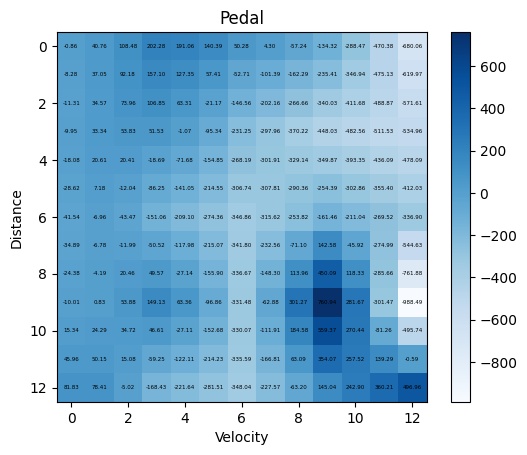

In [9]:
import numpy as np
import matplotlib.pyplot as plt

num=13
samplesVelocity = np.linspace(0.01, maxOfVelocity, num)
samplesDistance = np.linspace(0.01, maxOfDistance, num)

matrix = np.random.rand(num, num)

for i in range(len(matrix)):
    for j in range(len(matrix[0])):
      # print(i,j)
      matrix[i, j] = fis.get_output(samplesVelocity[i], samplesDistance[j])

# Define maximum value
max_value = np.max(matrix)

# Create a new figure and axis
fig, ax = plt.subplots()

# Create a heatmap
heatmap = ax.imshow(matrix, cmap='Blues')

# Add color bar
cbar = plt.colorbar(heatmap)


# Iterate over each cell to annotate the value
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        ax.text(j, i, f'{matrix[i, j]:.2f}', ha='center', va='center', color='black',fontsize=4)

plt.title('Pedal')
plt.xlabel('Velocity')
plt.ylabel('Distance')

# Show plot
plt.show()


Downloading...
From: https://drive.google.com/uc?id=1Rup52iGA-xR_tqv1xy72sx-S24kvhgGA
To: /content/Sugeno_Rules_Table.xlsx
100%|██████████| 10.5k/10.5k [00:00<00:00, 18.8MB/s]
<ipython-input-16-ba4bf1f8349e>:42: RuntimeWarning: invalid value encountered in scalar divide
  upper_membership = (x - a) / (b - a)


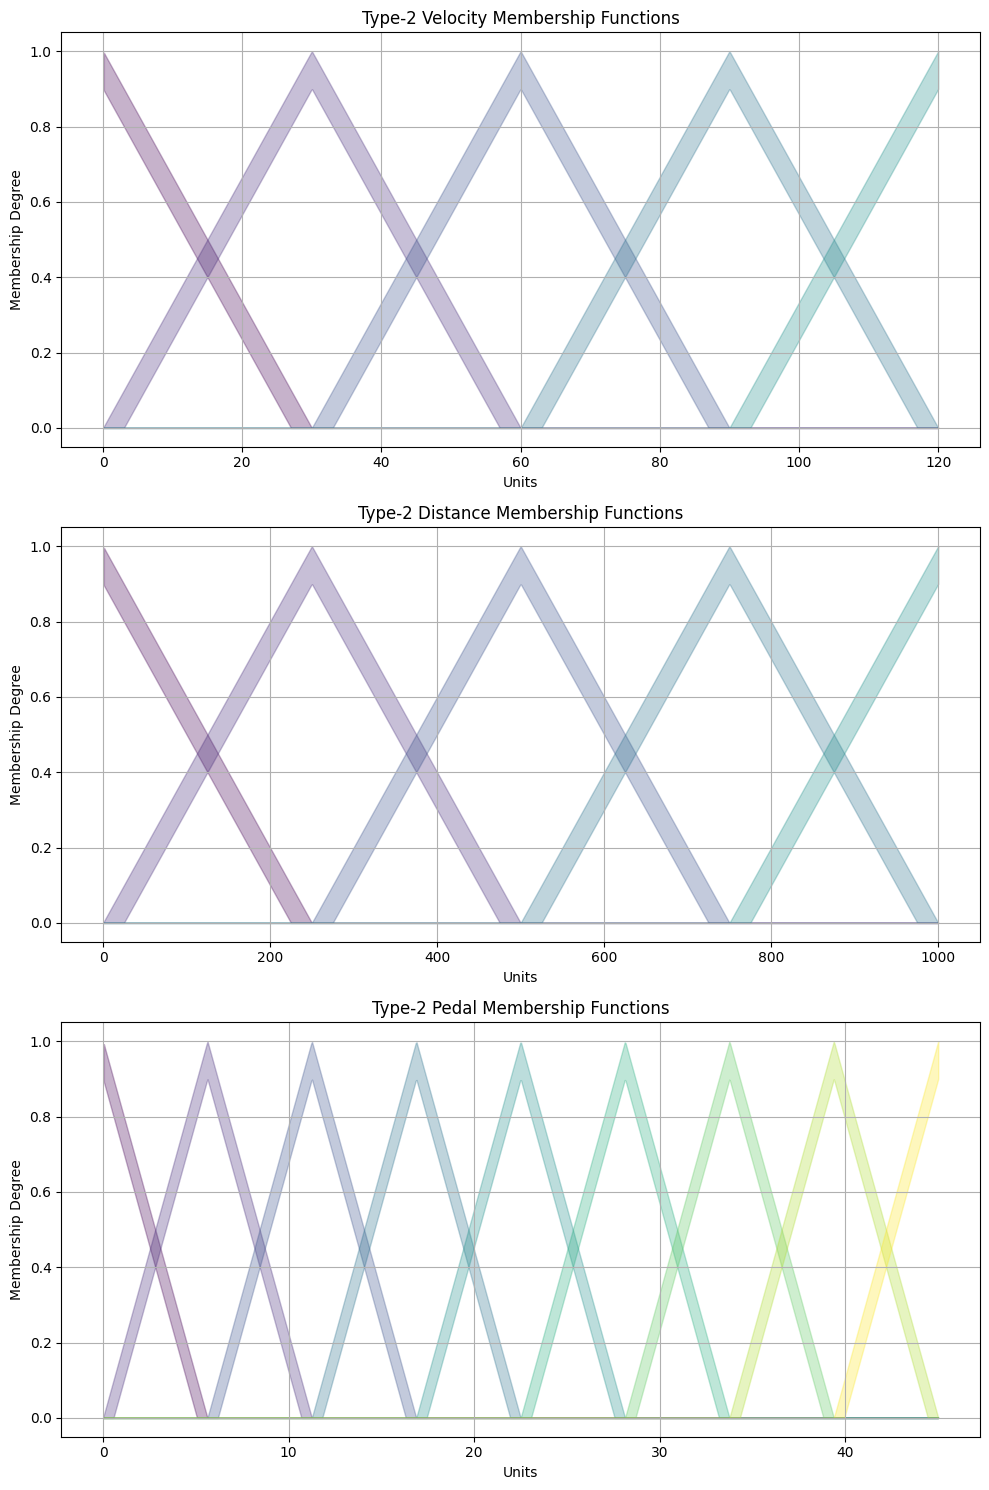

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gdown

# We'll assume the FOU is constant and given by a specific value
FOU_CONSTANT = 0.1

class Updated_Type2_FIS:
    def __init__(self, numberOfMFInputV=5, numberOfMFInputD=5, numberOfMFOutputP=9,
                 maxOfVelocity=120, maxOfDistance=1000, maxOfPedal=45):
        self.numberOfMFInputV = numberOfMFInputV
        self.numberOfMFInputD = numberOfMFInputD
        self.numberOfMFOutputP = numberOfMFOutputP
        self.maxOfVelocity = maxOfVelocity
        self.maxOfDistance = maxOfDistance
        self.maxOfPedal = maxOfPedal
        self.data = self.load_data()

    def load_data(self):
        url = 'https://drive.google.com/uc?id=1Rup52iGA-xR_tqv1xy72sx-S24kvhgGA'
        file_path = 'Sugeno_Rules_Table.xlsx'
        gdown.download(url, file_path, quiet=False)
        return pd.read_excel(file_path)

    def get_parameters_MFs(self, numberOfMFs, maxValue):
        step = maxValue / (numberOfMFs - 1)
        parameters_MFs = []
        for i in range(numberOfMFs):
            if i == 0:
                parameters_MFs.append([0, 0, step])
            elif i == numberOfMFs - 1:
                parameters_MFs.append([(i - 1) * step, maxValue, maxValue])
            else:
                parameters_MFs.append([(i - 1) * step, i * step, (i + 1) * step])
        return parameters_MFs

    def triangular_type2(self, x, params):
        a, b, c = params
        upper_membership = 0.0
        if a <= x <= b:
            upper_membership = (x - a) / (b - a)
        elif b < x <= c:
            upper_membership = (c - x) / (c - b)
        lower_membership = max(0, upper_membership - FOU_CONSTANT)
        return (lower_membership, upper_membership)

    def plot_membership_functions_type2(self):
        fig, axs = plt.subplots(3, 1, figsize=(10, 15))
        colors = plt.cm.viridis(np.linspace(0, 1, max(self.numberOfMFInputV, self.numberOfMFInputD, self.numberOfMFOutputP)))

        for idx, (numMFs, maxValue, title) in enumerate([
            (self.numberOfMFInputV, self.maxOfVelocity, 'Type-2 Velocity Membership Functions'),
            (self.numberOfMFInputD, self.maxOfDistance, 'Type-2 Distance Membership Functions'),
            (self.numberOfMFOutputP, self.maxOfPedal, 'Type-2 Pedal Membership Functions')
        ]):
            for i, params in enumerate(self.get_parameters_MFs(numMFs, maxValue)):
                x = np.linspace(0, maxValue, 1000)
                y_lower, y_upper = zip(*[self.triangular_type2(xi, params) for xi in x])
                axs[idx].fill_between(x, y_lower, y_upper, color=colors[i], alpha=0.3)
            axs[idx].set_title(title)
            axs[idx].set_xlabel('Units')
            axs[idx].set_ylabel('Membership Degree')
            axs[idx].grid(True)

        plt.tight_layout()
        plt.show()

# Create an instance of the Type-2 FIS
type2_fis = Updated_Type2_FIS()

# Plot the Type-2 membership functions
type2_fis.plot_membership_functions_type2()
